In [1]:
import pandas as pd

df = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Age

In [4]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_test["Age"] = df_test["Age"].fillna(df["Age"].mean())
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df_test["Fare"]= df_test["Fare"].fillna(df["Fare"].mean())
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [7]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df["Embarked"] = df["Embarked"].fillna("S")
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
df["FamilySize"] = df["SibSp"] + df["Parch"]
df_test["FamilySize"] = df_test["SibSp"] + df["Parch"]

In [10]:
train = df[["Survived","Sex","Age","FamilySize","Fare","Embarked"]]
test = df_test[["Sex","Age","FamilySize","Fare","Embarked"]]

train.head()

,Survived,Sex,Age,FamilySize,Fare,Embarked
0,0,male,22.0,1,7.2500,S
1,1,female,38.0,1,71.2833,C
2,1,female,26.0,0,7.9250,S
3,1,female,35.0,1,53.1000,S
4,0,male,35.0,0,8.0500,S


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

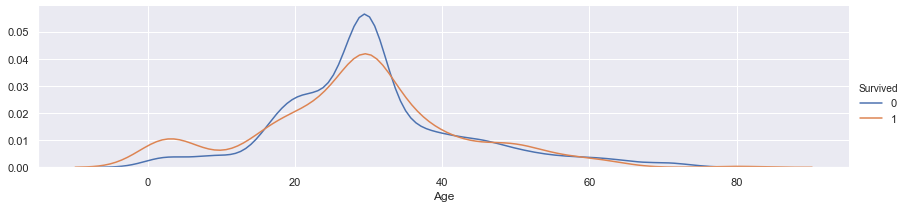

In [12]:
facet = sns.FacetGrid(df, hue = "Survived", aspect = 4)

facet.map(sns.kdeplot,"Age")
facet.add_legend()


plt.show()